In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy
import yulewalker

{0.005396031471292018, 0.005124158617769834, 0.004342393747667682, 0.003130440953013723, 0.0016225450825625503, -1.444300076318857e-18, -0.001521456400901391, -0.0027086255520274213, -0.0033310219131378617, -0.003182674968576813, -0.002103741293043269, -1.483983642745592e-19, 0.003141638038132469, 0.0072432505776113525, 0.012132913515885387, 0.017549343795154566, 0.02315431249063755, 0.02855231422962516, 0.03331634014026463, 0.037018030271488624, 0.03926002999427127, 0.03970808680477073, 0.03812032996498682, 0.03437129044705291, 0.028468539988971742, 0.02056033516890685, 0.010933308207510045, -4.2843512410515336e-18, -0.011723177600623502, -0.02364619876172064, -0.03514187479300596, -0.045585948767361426, -0.054397951293508454, -0.06107982731466832, -0.06524947165805225, 0.9333333333333331, -0.06524947165805225, -0.06107982731466832, -0.054397951293508454, -0.045585948767361426, -0.03514187479300596, -0.02364619876172064, -0.011723177600623502, -4.2843512410515336e-18, 0.01093330820751

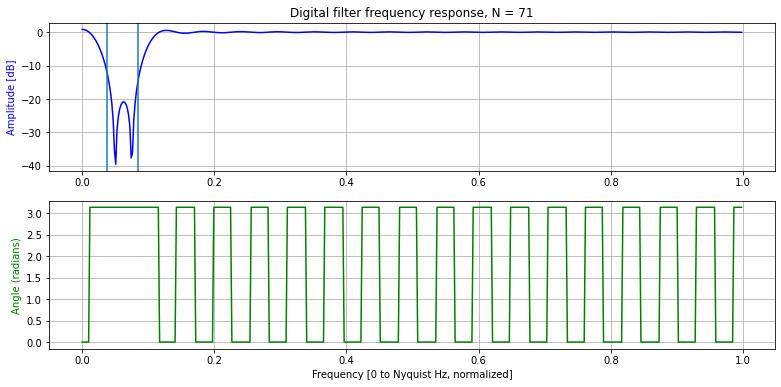

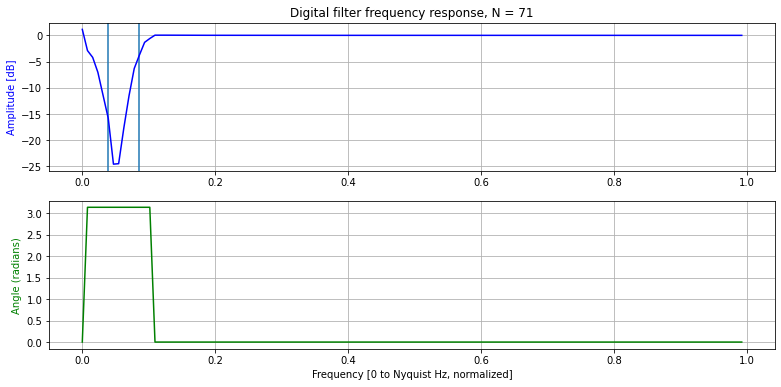

[(0.13805827090970768, -21.450007049501544, 23), (0.25464081078901646, -17.84925484040771, 42)]
18
18


In [29]:
# Your filter design here
# firls() can be called via signal.firls()

units = 'rad' # 'Hz'/'rad'

fs = 48000
numtaps = 71

bands = [0, 400, 400, 1000, 1000, 1200, 1200, 1400, 1400, 1600, 1600, 1800, 1800, 2000, 2000, 2600, 2600, 24000]
desired = [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]
f = np.array([0, 0.025, 0.03, 0.04, 0.07, 0.08, 0.095, 1])
m = np.array([1, 0.3, 0, 0, 0, 0.3, 1, 1])

a_1,b_1 = yulewalker.yulewalk(17,f,m)
b = signal.firls(numtaps, bands, desired, weight=None, nyq=None, fs=fs)
# b_1 = yulewalker.yulewalk(11, np.array(bands_1), np.array(desired_1))

# coefficients of the filter
coef_str = "{" 
for val in b: 
    coef_str += str(val) + ", " 
coef_str = coef_str[:-2] 
coef_str += "};" 
print(coef_str) 

# Signal analysis
# w, h = signal.freqz(b)
w, h = signal.freqz(b, fs=fs) if units == 'Hz' else signal.freqz(b)
w_1, h_1 = signal.freqz(b_1, a_1, 128)

h = 20 * np.log10(abs(h))
h_1 = 20 * np.log10(abs(h_1))

intersects = []
for i in range(1, len(w)):
    if (h[i-1] > -20 and h[i] <= -20) or (h[i-1] <= -20 and h[i] > -20):
        intersects.append(((w[i] + w[i-1])/2, h[i], i))

plt.figure(figsize=(13,6))
plt.subplot(2,1,1)
plt.title('Digital filter frequency response, N = ' + str(len(b)))
# plt.plot(w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.plot(w, h, 'b') if signal == 'Hz' else plt.plot(w/np.pi, h, 'b')
if units == 'Hz':
    plt.axvline(x=1000)
    plt.axvline(x=2000)
else:
    plt.axvline(x=0.13805827090970768-0.1)
    plt.axvline(x=0.25464081078901646-0.17)
plt.ylabel('Amplitude [dB]', color='b')
plt.grid()
plt.axis('tight')

plt.subplot(2,1,2)
angles = np.unwrap(np.angle(h))
plt.plot(w / np.pi, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('Frequency [0 to Nyquist Hz, normalized]')
plt.show()

plt.figure(figsize=(13,6))
plt.subplot(2,1,1)
plt.title('Digital filter frequency response, N = ' + str(len(b)))
# plt.plot(w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.axvline(x=0.13805827090970768-0.1)
plt.axvline(x=0.25464081078901646-0.17)
plt.plot(w_1/np.pi, h_1, 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.grid()
plt.axis('tight')

plt.subplot(2,1,2)
angles = np.unwrap(np.angle(h_1))
plt.plot(w_1 / np.pi, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('Frequency [0 to Nyquist Hz, normalized]')
plt.show()

print(intersects)
print(len(a_1))
print(len(b_1))

#### You can design any filter if you allow the filter order to go to infinity. What are the practical considerations to using a longer filter?

**Answer**: Theoretically, taking the filter order to 

#### The sharper the transition bands, the larger the ripple in the passband. We've defined a relatively narrow stopband. How wide can you make the transition bands while still meeting your application's requirements?

**Answer**:

Create a chirp signal and apply the filter

In [30]:
def lab_fir_filter(coef, data):
    """
    Description: Takes a filter and applies it to data via a circular buffer approach
    Inputs:
            coef -- coeffiecients of the filter
            data -- data to apply filter to
    Outputs:
            None
    Returns:
            filtered_data -- array holding the values of the filtered data
    """
    num_taps = len(coef)
    filtered_data = np.zeros(len(data)) # initialize output
    circular_buffer = np.zeros(num_taps) # initialze circular buffer for holding samples
    pointer = 0 # points to the newest entry

    
    for i in range(len(data)):
        # fill buffer with a new sample
        circular_buffer[pointer] = data[i]

        # perform convolution
        sum = 0
        for j in range(num_taps):
            sum += coef[j] * circular_buffer[ (pointer - j)%num_taps]

        # hold result and update pointer
        filtered_data[i] = sum
        pointer = (pointer + 1) % len(circular_buffer)

    # return output
    return filtered_data

def lab_iir_filter(a, b, data):
        p = len(b)
        y = np.zeros(len(data))
        for n in range(len(data)):
                sum = 0
                for i in range(p):
                        j = i + 1
                        curr_data = data[n-i] if n-i > -1 else 0
                        curr_y = y[n-j] if n-j > -1 else 0
                        try:
                                sum += (b[i] * curr_data) - (a[j-1] * curr_y)
                        except:
                                print((b[i] * curr_data) - (a[j-1] * curr_y))

                # sum *= 1/a[0]
                y[n] = sum

        return y




Does our implementation match lfilter? True


C:\Users\flaco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\flaco\AppData\Local\Temp\ipykernel_7540\3788528433.py:44: RuntimeWarning: overflow encountered in double_scalars
  sum += (b[i] * curr_data) - (a[j-1] * curr_y)
C:\Users\flaco\AppData\Local\Temp\ipykernel_7540\3788528433.py:44: RuntimeWarning: invalid value encountered in double_scalars
  sum += (b[i] * curr_data) - (a[j-1] * curr_y)


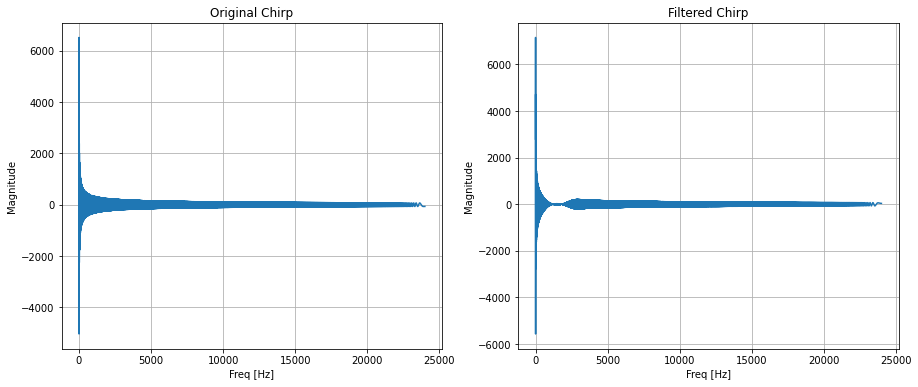

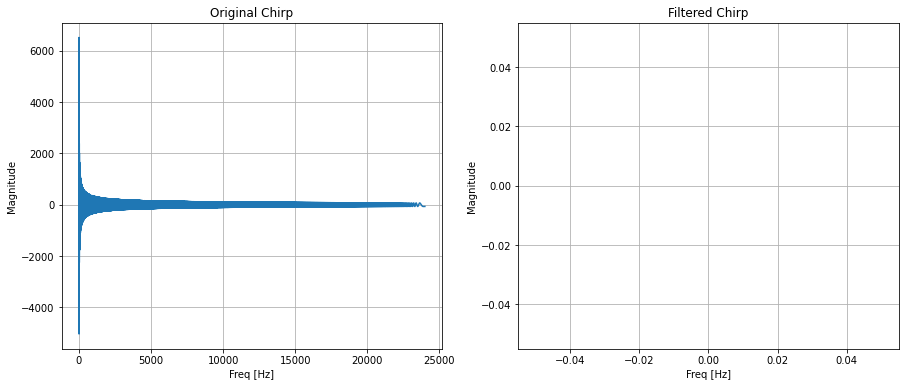

In [31]:

F_s = 48000
t = [i / F_s for i in range(2 * F_s)]

test_data = signal.chirp(t, 1, t[-1], 24000, method='logarithmic')
filtered_data = lab_fir_filter(b, test_data)

tb_filtered_test_data = signal.lfilter(b, [1.0], test_data)
print("Does our implementation match lfilter? {}".format(np.allclose(tb_filtered_test_data, filtered_data)))

test_data_freq = np.fft.rfft(test_data)
filtered_test_data_freq = np.fft.rfft(filtered_data)
freq = np.linspace(0, fs/2, len(test_data_freq))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("Original Chirp")
plt.xlabel("Freq [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.plot(freq, test_data_freq)

plt.subplot(122)
plt.title("Filtered Chirp")
plt.xlabel("Freq [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.plot(freq, filtered_test_data_freq)

# filtered_test_data = signal.lfilter(b_1, a_1, test_data)
filtered_test_data = lab_iir_filter(b_1, a_1, test_data)
filtered_test_data_freq = np.fft.rfft(filtered_test_data)

# test_data_freq = np.fft.rfft(test_data)
# filtered_test_data_freq = np.fft.rfft(filtered_data)
freq = np.linspace(0, fs/2, len(test_data_freq))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("Original Chirp")
plt.xlabel("Freq [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.plot(freq, test_data_freq)

plt.subplot(122)
plt.title("Filtered Chirp")
plt.xlabel("Freq [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.plot(freq, filtered_test_data_freq)



In [32]:
# attempt at getting laplace transform of fir filter 
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

num_ = b
den_ = [1]
f = sympy.Poly(num_, t)/sympy.Poly(den_, t)

# res = np.poly1d(b)

# f = sympy.poly(res)


# den_ = sum(co**i for i, co in enumerate(reversed(den_)))
# num_ = sum(co**i for i, co in enumerate(reversed(num_)))
# res = num_/den_

# f = res

# print(num_)

# sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))
lt = sympy.laplace_transform(f, t, s)[0]
# print(type(lt))
# print(lt)
lt = sympy.Poly(lt)
print(lt)
coeff_ = lt.all_coeffs()
print(coeff_)


r, p, k = signal.residue([1], coeff_)
print("r: {}".format(r))
print("p: {}".format(p))
print("k: {}".format(k))

print("len b: {}, len r: {}".format(len(b), len(r)))



Poly(6.46367497122845e+97*(1/s)**71 + 8.76858589303569e+95*(1/s)**70 + 1.07692908334713e+94*(1/s)**69 + 1.14170659220204e+92*(1/s)**68 + 8.83224204117916e+89*(1/s)**67 - 1.1912082379596e+73*(1/s)**66 - 1.93052935164954e+86*(1/s)**65 - 5.37014354276651e+84*(1/s)**64 - 1.04827170536215e+83*(1/s)**63 - 1.61546284125191e+81*(1/s)**62 - 1.7505204187955e+79*(1/s)**61 - 2.05803479446752e+61*(1/s)**60 + 7.38461288932159e+75*(1/s)**59 + 2.93546633112511e+74*(1/s)**58 + 8.62648437575305e+72*(1/s)**57 + 2.22813547415303e+71*(1/s)**56 + 5.34502710468695e+69*(1/s)**55 + 1.22057810821454e+68*(1/s)**54 + 2.68723519908821e+66*(1/s)**53 + 5.7419360963866e+64*(1/s)**52 + 1.19405821134783e+63*(1/s)**51 + 2.41537090588404e+61*(1/s)**50 + 4.7322255854497e+59*(1/s)**49 + 8.88921455033867e+57*(1/s)**48 + 1.56651619000813e+56*(1/s)**47 + 2.45947295464328e+54*(1/s)**46 + 2.90637024264252e+52*(1/s)**45 - 2.58840207284021e+35*(1/s)**44 - 1.64711362483795e+49*(1/s)**43 - 7.91025093376621e+47*(1/s)**42 - 2.8672792